In [1]:
#Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])  # converting job_posted_date to datetime object
df['job_skills'] = df['job_skills'].apply(lambda data: ast.literal_eval(data) if pd.notna(data) else data)  # converting job_skills to list

# Examples

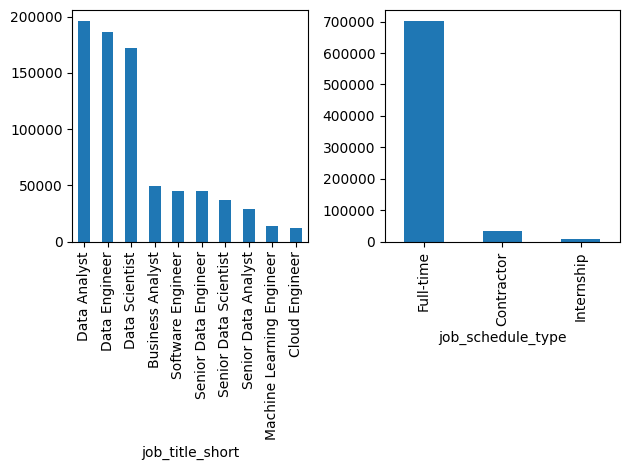

In [11]:
fix, ax = plt.subplots(1, 2)

df['job_title_short'].value_counts().plot(kind='bar', ax=ax[0])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax=ax[1])

fix.tight_layout()

In [13]:
df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
293,codecommit,Business Analyst,1
2233,xamarin,Machine Learning Engineer,1
1087,mlr,Machine Learning Engineer,1


In [14]:
job_titles = ['Data Scientist', 'Data Engineer', 'Data Analyst']

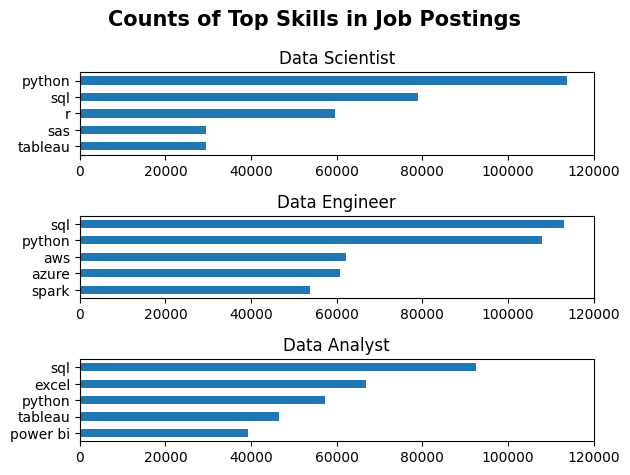

In [27]:
fig, ax = plt.subplots(3, 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()    
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 120000)
    
fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15, fontweight='bold')
fig.tight_layout()

# Exercises

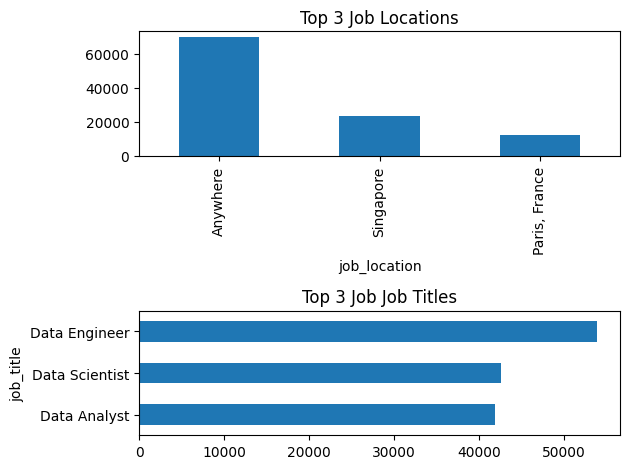

In [34]:
# Create a subplot with 2 rows and 1 column:
# 
# In the first subplot, plot a bar chart of the top 3 job locations by the number of job postings.
# In the second subplot, plot a horizontal bar chart of the top 3 job titles by the number of job postings.
# Use tight_layout() to adjust the spacing between subplots.

fig, ax = plt.subplots(2, 1)

df['job_location'].value_counts().head(3).plot(kind='bar', ax=ax[0])
ax[0].set_title('Top 3 Job Locations')
df['job_title'].value_counts().head(3).plot(kind='barh', ax=ax[1])
ax[1].set_title('Top 3 Job Job Titles')
ax[1].invert_yaxis()

fig.tight_layout()

In [ ]:
# Create a subplot with 2 rows and 2 columns:
# 
# In each subplot, plot a bar chart of the top 3 job titles by the number of job postings for each job schedule type (Full-time, Part-time, Contractor, and Internship).
# Use fig.tight_layout() to adjust the spacing between subplots.
